In [3]:
import pandas as pd

# Step 1: Reading the CSV file
dataset = pd.read_csv("candy_production.csv")

# Renaming columns
dataset.columns = ["date", "production"]

# Converting the date column to datetime
dataset['date'] = pd.to_datetime(dataset['date'], format="%Y-%m-%d")

# Setting the date column as the index
dataset.set_index('date', inplace=True)

# 

# Step 3: Check for and handle missing values
dataset = dataset.dropna()  # Drop rows with missing values, or use dataset.fillna() for imputation

# Step 5: Add Lag Features
# Adding lags of 1, 2, and 3 months as an example
dataset['lag_1'] = dataset['production'].shift(1)
dataset['lag_2'] = dataset['production'].shift(2)
dataset['lag_3'] = dataset['production'].shift(3)

# Step 6: Normalization/Standardization (if required)

column='production'
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
datase5t= Ms.fit_transform(dataset[[column]])

# Drop rows with NaN values created by lagging
dataset = dataset.dropna()

# Save the cleaned and processed dataframe to a CSV file
dataset.to_csv('preprocessed_candy_production_dataset.csv', index=False)

# Display the cleaned dataframe
print(dataset)

            production     lag_1     lag_2     lag_3
date                                                
1972-04-01     64.5645   66.0229   71.8200   85.6945
1972-05-01     65.0100   64.5645   66.0229   71.8200
1972-06-01     67.6467   65.0100   64.5645   66.0229
1972-07-01     69.0429   67.6467   65.0100   64.5645
1972-08-01     70.8370   69.0429   67.6467   65.0100
...                ...       ...       ...       ...
2017-04-01    107.4288  105.2245  113.4661  109.4666
2017-05-01    101.9209  107.4288  105.2245  113.4661
2017-06-01    104.2022  101.9209  107.4288  105.2245
2017-07-01    102.5861  104.2022  101.9209  107.4288
2017-08-01    114.0613  102.5861  104.2022  101.9209

[545 rows x 4 columns]


In [4]:
#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("1972-01-01")
end_date = pd.to_datetime("2017-02-04") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')
all_date
dataset

,production,lag_1,lag_2,lag_3
date,,,,
1972-04-01,64.5645,66.0229,71.8200,85.6945
1972-05-01,65.0100,64.5645,66.0229,71.8200
1972-06-01,67.6467,65.0100,64.5645,66.0229
1972-07-01,69.0429,67.6467,65.0100,64.5645
1972-08-01,70.8370,69.0429,67.6467,65.0100
...,...,...,...,...
2017-04-01,107.4288,105.2245,113.4661,109.4666
2017-05-01,101.9209,107.4288,105.2245,113.4661
2017-06-01,104.2022,101.9209,107.4288,105.2245


In [10]:
# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
train, test = dataset[:train_size], dataset[train_size:]


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Define evaluation metrics
def evaluate_model(true_values, predictions):
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# For time series analysis on your candy production dataset, you can use a variety of algorithms to model and forecast the data. Here are seven commonly used time series forecasting algorithms, along with code snippets to implement them in Python:

1. *Autoregressive (AR) Model*
2. *Moving Average (MA) Model*
3. *Autoregressive Moving Average (ARMA) Model*
4. *Autoregressive Integrated Moving Average (ARIMA) Model*
5. *Seasonal ARIMA (SARIMA) Model*
6. *Vector Autoregression (VAR) Model*
7. *Prophet Model*


# Autoregressive (AR) Model

In [16]:

### 1. Autoregressive (AR) Model
from statsmodels.tsa.ar_model import AutoReg
# Fit and evaluate AR model
ar_model = AutoReg(train['production'], lags=3).fit()
ar_predictions = ar_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
ar_mae, ar_mse, ar_rmse = evaluate_model(test['production'], ar_predictions)


C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Moving Average (MA) Model

In [17]:
from statsmodels.tsa.arima.model import ARIMA
# Fit and evaluate MA model
ma_model = ARIMA(train['production'], order=(0, 0, 3)).fit()
ma_predictions = ma_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
ma_mae, ma_mse, ma_rmse = evaluate_model(test['production'], ma_predictions)


C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Autoregressive Moving Average (ARMA) Model

In [18]:
from statsmodels.tsa.arima.model import ARIMA
# Fit and evaluate ARMA model
arma_model = ARIMA(train['production'], order=(3, 0, 3)).fit()
arma_predictions = arma_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
arma_mae, arma_mse, arma_rmse = evaluate_model(test['production'], arma_predictions)


C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarima

# Autoregressive Integrated Moving Average (ARIMA) Model

In [19]:
### 4. Autoregressive Integrated Moving Average (ARIMA) Model

from statsmodels.tsa.arima.model import ARIMA
# Fit and evaluate ARIMA model
arima_model = ARIMA(train['production'], order=(3, 1, 3)).fit()
arima_predictions = arima_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
arima_mae, arima_mse, arima_rmse = evaluate_model(test['production'], arima_predictions)



C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\statespace\sarima

# Seasonal ARIMA (SARIMA) Model

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit and evaluate SARIMA model
sarima_model = SARIMAX(train['production'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_predictions = sarima_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
sarima_mae, sarima_mse, sarima_rmse = evaluate_model(test['production'], sarima_predictions)





C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Vector Autoregression (VAR) Mode

In [24]:
from statsmodels.tsa.api import VAR
# Prepare data for VAR model
# Forecasting with VAR model
lag_order = var_results.k_ar
var_forecast = var_results.forecast(var_data.values[-lag_order:], steps=len(test))
var_predictions = var_forecast[:, 0]  # Extract the first column which corresponds to 'production'
var_mae, var_mse, var_rmse = evaluate_model(test['production'].iloc[:len(var_predictions)], var_predictions)



In [25]:
# Print the predictions from each model
print("AR Predictions:", ar_predictions)
print("MA Predictions:", ma_predictions)
print("ARMA Predictions:", arma_predictions)
print("ARIMA Predictions:", arima_predictions)
print("SARIMA Predictions:", sarima_predictions)
print("VAR Forecast:", var_forecast)

AR Predictions: 2008-08-01     87.012490
2008-09-01     89.357659
2008-10-01     92.643411
2008-11-01     95.653673
2008-12-01     98.193081
                 ...    
2017-04-01    100.349254
2017-05-01    100.349254
2017-06-01    100.349254
2017-07-01    100.349254
2017-08-01    100.349254
Freq: MS, Length: 109, dtype: float64
MA Predictions: 2008-08-01    92.072605
2008-09-01    95.879492
2008-10-01    97.888512
2008-11-01    99.968588
2008-12-01    99.968588
                ...    
2017-04-01    99.968588
2017-05-01    99.968588
2017-06-01    99.968588
2017-07-01    99.968588
2017-08-01    99.968588
Freq: MS, Name: predicted_mean, Length: 109, dtype: float64
ARMA Predictions: 2008-08-01     89.314124
2008-09-01     89.003308
2008-10-01     94.561850
2008-11-01     94.078753
2008-12-01     98.588155
                 ...    
2017-04-01    100.962122
2017-05-01     98.166554
2017-06-01    100.962024
2017-07-01     98.166651
2017-08-01    100.961927
Freq: MS, Name: predicted_mean, Length

In [26]:
# Compile results into a DataFrame
results = pd.DataFrame({
    'Model': ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'VAR'],
    'MAE': [ar_mae, ma_mae, arma_mae, arima_mae, sarima_mae, var_mae],
    'MSE': [ar_mse, ma_mse, arma_mse, arima_mse, sarima_mse, var_mse],
    'RMSE': [ar_rmse, ma_rmse, arma_rmse, arima_rmse, sarima_rmse, var_rmse]
})

In [27]:
# Display the results
print(results)

    Model        MAE         MSE       RMSE
0      AR  10.398133  161.948075  12.725882
1      MA  10.278656  157.456085  12.548151
2    ARMA  10.529699  163.107702  12.771363
3   ARIMA   9.690958  145.342641  12.055814
4  SARIMA  23.789914  765.223565  27.662675
5     VAR  10.133529  153.608602  12.393894


In [31]:

# Find the model with the lowest MAE
best_model_mae = results.loc[results['MAE'].idxmin()]
print("Best Model by MAE:")
print(best_model_mae)

# Find the model with the lowest MSE
best_model_mse = results.loc[results['MSE'].idxmin()]
print("\nBest Model by MSE:")
print(best_model_mse)

# Find the model with the lowest RMSE
best_model_rmse = results.loc[results['RMSE'].idxmin()]
print("\nBest Model by RMSE:")
print(best_model_rmse)

# Overall best model (lowest average of MAE, MSE, RMSE)
results['Average'] = (results['MAE'] + results['MSE'] + results['RMSE']) / 3
best_model_avg = results.loc[results['Average'].idxmin()]
print("\nBest Model by Average of MAE, MSE, RMSE:")
print(best_model_avg)

Best Model by MAE:
Model        ARIMA
MAE        9.69096
MSE        145.343
RMSE       12.0558
Average    55.6965
Name: 3, dtype: object

Best Model by MSE:
Model        ARIMA
MAE        9.69096
MSE        145.343
RMSE       12.0558
Average    55.6965
Name: 3, dtype: object

Best Model by RMSE:
Model        ARIMA
MAE        9.69096
MSE        145.343
RMSE       12.0558
Average    55.6965
Name: 3, dtype: object

Best Model by Average of MAE, MSE, RMSE:
Model        ARIMA
MAE        9.69096
MSE        145.343
RMSE       12.0558
Average    55.6965
Name: 3, dtype: object


# Since ARIMA is identified as the best model based on your evaluation

### Forecasting with ARIMA Model

1. *Prepare Data*:
   - Ensure your data is in the correct format and split into train and test sets.

2. *Fit ARIMA Model*:
   - Fit the ARIMA model on the training data.

3. *Make Predictions*:
   - Use the fitted ARIMA model to forecast future values.



C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


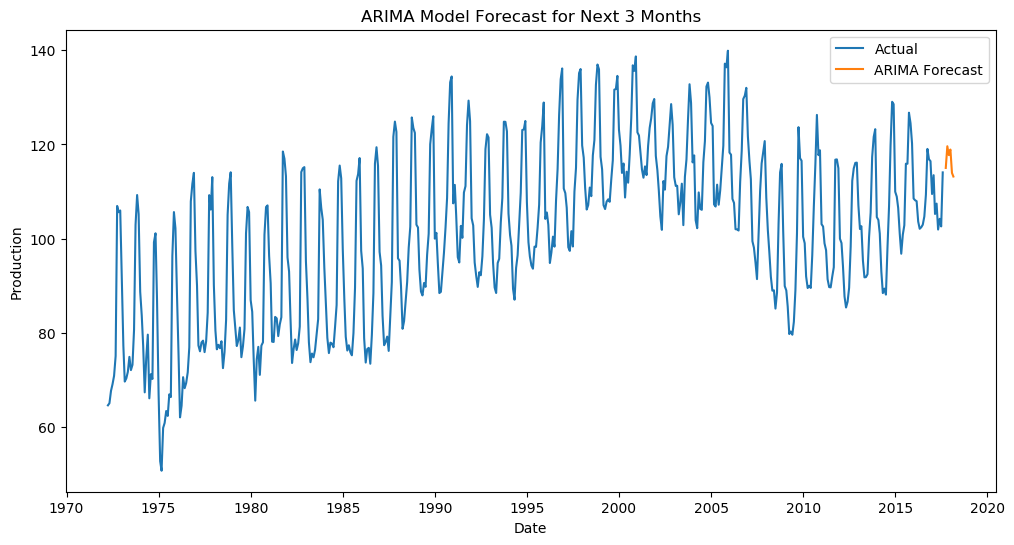

                 Date    Forecast
2017-09-01 2017-09-30  115.006778
2017-10-01 2017-10-31  119.616740
2017-11-01 2017-11-30  117.731649
2017-12-01 2017-12-31  118.919299
2018-01-01 2018-01-31  113.948667
2018-02-01 2018-02-28  113.182283


In [36]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
arima_model = ARIMA(dataset['production'], order=(3, 1, 3)).fit()

# Forecasting next 6 months
forecast_period = 6
forecast = arima_model.forecast(steps=forecast_period)

# Generate dates for the forecast period
last_date = dataset.index.max()  # Use index instead of 'date'
forecast_index = pd.date_range(start=dataset.index[-1], periods=forecast_period + 1, freq='M')[1:]

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['production'], label='Actual')  # Use index instead of 'date'
plt.plot(forecast_index, forecast, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

# Display the forecasted values
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast
})
print(forecast_df)

